# Clustering 예제1
### Hierarchical Clustering

### 라이브러리 불러오기

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA

sns.set_style('white')

### 데이터 불러오기 및 데이터 분할(X/Y)

In [4]:
data = pd.read_csv("BreastCancerWisconsin.csv")
print("- Data has {} rows and {} columns.".format(*data.shape))
print("- Column names: ", list(data.columns))

X = data.drop(['diagnosis'], axis=1)
X = X.iloc[:, :10]
y = data['diagnosis']

- Data has 569 rows and 31 columns.
- Column names:  ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


## Hierarchical Clustering 모델링
#### 1. 군집화 방법 설정
#### >> single / complete / average / weighted / centroid / median / ward ..

In [5]:
method = 'ward' 

#### 2. 유사도 산출 방법 설정
#### euclidean / minkowski / cosine / correlation / jaccard

In [6]:
metric = 'euclidean'

### ---------------------------------------
### 모델링

In [16]:
D = linkage(X, method=method, metric=metric)
pd.DataFrame(D).head(10)

,0,1,2,3
0,99.0,199.0,0.494144,2.0
1,173.0,381.0,0.514103,2.0
2,49.0,267.0,0.533573,2.0
3,427.0,550.0,0.833775,2.0
4,240.0,532.0,0.848678,2.0
5,5.0,485.0,0.863131,2.0
6,293.0,399.0,0.872380,2.0
7,344.0,488.0,0.878380,2.0
8,403.0,475.0,0.883522,2.0
9,312.0,322.0,0.885579,2.0


### 군집결과 시각화

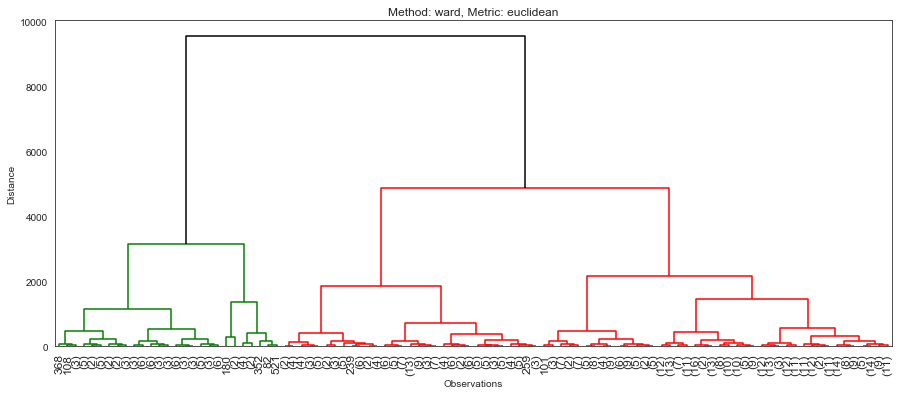

In [20]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
dendrogram(Z=D,
           p=100,
           truncate_mode='lastp',
           orientation='top',
           show_leaf_counts=True,
           no_labels=False,
           leaf_font_size=12.,
           leaf_rotation=90.,
           ax=ax,
           above_threshold_color='k')
ax.set_xlabel('Observations')
ax.set_ylabel('Distance')
ax.set_title('Method: {}, Metric: {}'.format(method, metric))
plt.show(fig)

In [25]:
num_clusters = 2
label_hc = fcluster(D, t=num_clusters, criterion='maxclust')

## PCA를 사용하여 군집결과 확인

In [26]:
pca = PCA(n_components=2)
Z = pca.fit_transform(X)

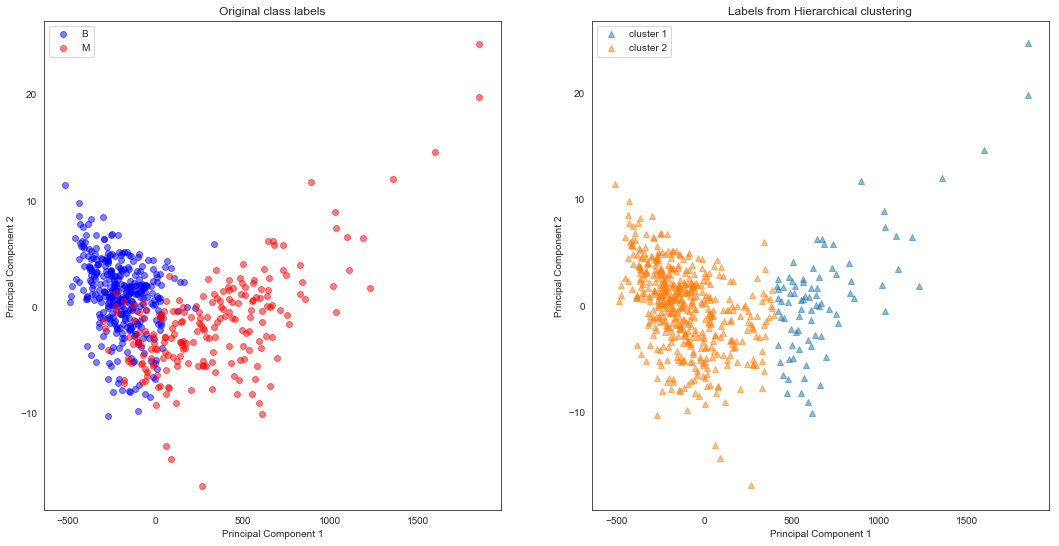

In [27]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9))
axes = axes.ravel()
for label, color in zip(('B', 'M'), ('blue', 'red')):
    axes[0].scatter(Z[y == label, 0], Z[y == label, 1],
                    label=label, color=color, marker='o', alpha=0.5)
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].legend(loc='best')
    axes[0].set_title('Original class labels')
for i in range(num_clusters):
    axes[1].scatter(Z[label_hc == i + 1, 0], Z[label_hc == i + 1, 1],
                    label='cluster {}'.format(i + 1), marker='^', alpha=0.5)
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].legend(loc='best')
    axes[1].set_title('Labels from Hierarchical clustering')
plt.show(fig)

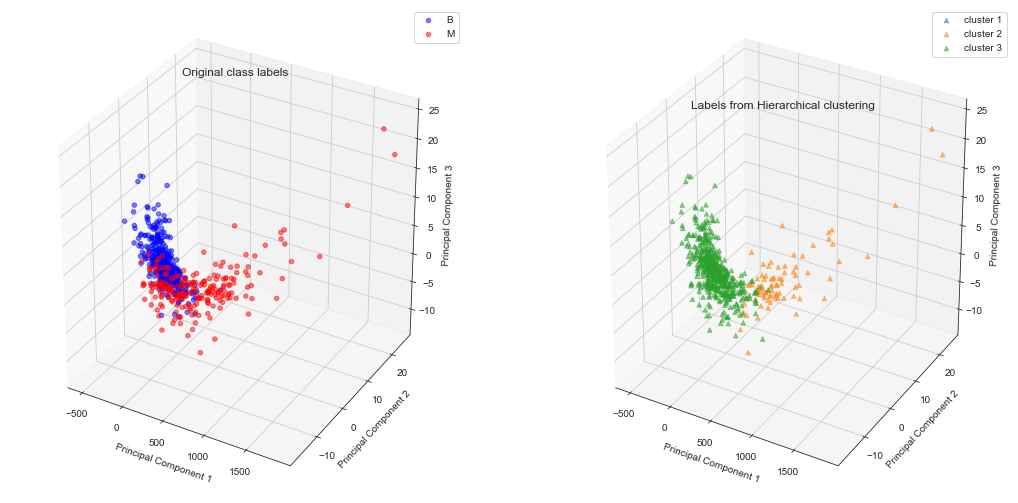

In [28]:
pca = PCA(n_components=3)
Z = pca.fit_transform(X)

# Plot the transformed data (Z) with 3 PCs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 9), subplot_kw={'projection': '3d'})
axes = axes.ravel()
for label, color in zip(('B', 'M'), ('blue', 'red')):
    axes[0].scatter(Z[y == label, 0], Z[y == label, 1], Z[y == label, 2],
                    label=label, color=color, marker='o', alpha=0.5)
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')
    axes[0].set_zlabel('Principal Component 3')
    axes[0].legend(loc='best')
    axes[0].set_title('Original class labels')
for i in range(max(label_hc) + 1):
    axes[1].scatter(Z[label_hc == i, 0], Z[label_hc == i, 1], Z[label_hc == i, 2],
                    label='cluster {}'.format(i + 1), marker='^', alpha=0.5)
    axes[1].set_xlabel('Principal Component 1')
    axes[1].set_ylabel('Principal Component 2')
    axes[1].set_zlabel('Principal Component 3')
    axes[1].legend(loc='best')
    axes[1].set_title('Labels from Hierarchical clustering')
plt.show(fig)